# SQL 문법

## INSERT문

* 테이블에 행 데이터를 삽입하는 명령어
* INSERT INTO 테이블 [(열1, 열2, ...)] VALUES (값1, 값2, ...)
* 테이블 이름 다음에 나오는 열은 생략 가능
* 열 이름을 생략할 경우 VALUES 다음에 나오는 값들의 순서 및 개수는 테이블을 정의할 때의 열 순서 및 개수와 동일해야 함

In [ ]:
# 새로운 테이블 hongong1 생성 및 데이터 삽입
USE market_db;
CREATE TABLE hongong1 (toy_id INT, toy_name CHAR(4), age INT);
INSERT INTO hongong1 VALUES (1, '우디', 25);
SELECT * FROM hongong1;

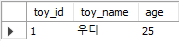

* 만약 아이디와 이름만 입력하고, 나이는 입력하고 싶지않다면 다음과 같이 테이블 이름 뒤에 입력할 열의 이름을 명시해야 한다.
* 이 경우 생략한 나이 열에는 NULL 값이 들어가게 된다.

In [ ]:
# NULL값을 삽입 하고 싶을 시
INSERT INTO hongong1 (toy_id, toy_name) VALUES (2, '버즈');

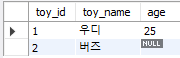

* 열의 순서를 바꿔서 입력하고자 할 때는 열 이름과 값을 원하는 순서에 맞춰서 입력하면 된다.

In [ ]:
# 열의 순서를 바꿔서 입력하기
INSERT INTO hongong1 (toy_name, age, toy_id) VALUES ('제시', 20, 3);

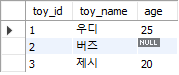

### AUTO_INCREMENT

* 열을 정의할 때부터 1부터 증가하는 값을 입력해준다.
* INSERT에서는 해당열이 없다고 생각하고 입력
* 주의할 점은 AUTO_INCREMENT로 지정하는 열은 꼭 PRIMARY KEY로 지정해야 한다.
* **MySQL**: AUTO_INCREMENT
* **MS-SQL(SQL Server)**: IDENTITY(초기값, 증가값)[제약조건]
* **Oracle**: MINVALUE 1 \ START WITH \ INCREMENT BY \ 1 CACHE 10

In [ ]:
# 자동으로 증가하는 AUTO_INCREMENT
CREATE TABLE hongong2 (
toy_id INT AUTO_INCREMENT PRIMARY KEY,
toy_name CHAR(4),
age INT);

In [ ]:
# 데이터 입력
# 자동 증가하는 부분은 NULL값으로 채워 넣으면 된다
INSERT INTO hongong2 VALUES (NULL, '보핍', 25);
INSERT INTO hongong2 VALUES (NULL, '슬링키', 22);
INSERT INTO hongong2 VALUES (NULL, '렉스', 21);
SELECT * FROM hongong2;

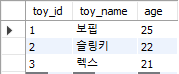

In [ ]:
# 현재 어느 숫자까지 증가되었는지 확인
# 자동 증가로 3까지 입력되었음을 알 수 있음
SELECT LAST_INSERT_ID();

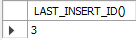

* ALTER TABLE: 테이블을 변경하라는 의미
* 테이블의 열 이름 변경, 새로운 열 정의, 열 삭제 등의 작업을 한다.

In [ ]:
# AUTO_INCREMENT로 입력되는 다음 값을 변경하고자 할 때
# 자동증가를 100부터 시작하기 위해 AUTO_INCREMENT를 100으로 저장
ALTER TABLE hongong2 AUTO_INCREMENT=100;
INSERT INTO hongong2 VALUES (NULL, '재남', 35);
SELECT * FROM hongong2;

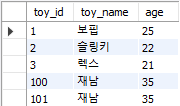

In [ ]:
# 처음부터 입력되는 값을 1000으로 지정, 다음값은 3씩 증가하도록 설정하는 방법
# @@auto_increment_increment를 변경시켜야 함
CREATE TABLE hongong3 (
toy_id INT AUTO_INCREMENT PRIMARY KEY,
toy_name CHAR(4),
age INT);
# 시작값은 1000으로 지정
ALTER TABLE hongong3 AUTO_INCREMENT=1000;
# 증가값은 3으로 지정
SET @@auto_increment_increment=3;

In [ ]:
# 데이터 삽입
INSERT INTO hongong3 VALUES (NULL, '토마스', 20);
INSERT INTO hongong3 VALUES (NULL, '제임스', 23);
INSERT INTO hongong3 VALUES (NULL, '고든', 25);
SELECT * FROM hongong3;

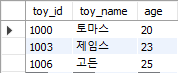

### 시스템 변수
* MySQL에서 자체적으로 가지고 있는 설정값이 저장된 변수
* 주로 MySQL의 환경과 관련된 내용이 저장되어 있으며, 그 개수는 500개 이상이다.
* 앞에 @@가 붙는 것이 특징, 시스템 변수의 값을 확인하려면 SELECT @@시스템변수를 실행하면 된다.
* 전체 시스템 변수의 종류를 알고 싶다면 SHOW GLOBAL VARIABLES를 실행하면 된다.

### INSERT INTO ~ SELECT
* 다른 테이블에 이미 데이터가 입력되어 있을 때 INSERT INTO ~ SELECT구문을 사용해 해당 테이블의 데이터를 가져와서 한번에 입력할 수 있다.
* INSERT INTO 테이블_이름 (열_이름1, 열_이름2, ...) SELECT 문;
* 주의할점은 SELECT문의 열 개수는 INSERT할 테이블의 열 개수와 같아야 한다.
* SELECT의 열이 3개라면 INSERT될 테이블의 열도 3개여야 한다.

In [ ]:
# world데이터베이스의 city테이블 개수 조회
# 데이터베이스_이름.테이블_이름으로 다른 데이터베이스의 테이블에 접근할 수 있다
SELECT COUNT(*) FROM world.city;

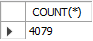

In [ ]:
# 테이블의 구조 확인
DESC world.city;

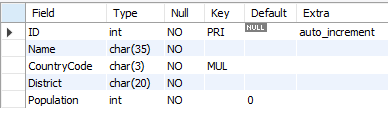

In [ ]:
# LIMIT을 사용하여 데이터 살펴보기
SELECT * FROM world.city LIMIT 5;

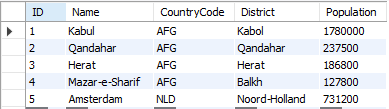

In [ ]:
# 도시이름과 인구를 가져오기
# 테이블 생성
CREATE TABLE city_popul (city_name CHAR(35), population INT);

In [ ]:
# world.city 테이블의 내용을 city_popul 테이블에 입력
INSERT INTO city_popul
SELECT Name, Population FROM world.city;

In [ ]:
# 데이터가 올바르게 입력되었는지 확인해준다
# 위의 원본과 동일하게 잘 입력되었음을 알 수 있다
SELECT * FROM city_popul LIMIT 5;

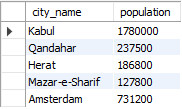

## UPDATE문

* 기존에 입력되어 있는 값을 수정하는 명령어
* UPDATE 테이블_이름 SET 열1=값2, 열2=값2, ... WHERE 조건;
* MySQL워크벤치에서는 기본적으로 UPDATE, DELETE를 허용하지 않아 설정을 변경해줘야 한다.
* Edit - Preferences메뉴에서 SQL Editor에서 Safe Update항목을 체크 해제한 후 OK를 눌러준다.

In [ ]:
# city_popul테이블의 도시 이름 변경
USE market_db;
UPDATE city_popul
SET city_name = '서울'
WHERE city_name = 'Seoul';
SELECT * FROM city_popul WHERE city_name = '서울';

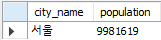

In [ ]:
# 한번에 여러 열의 값을 변경
# 도시이릉과 인구 값을 모두 변경
UPDATE city_popul
SET city_name = '뉴욕', population = 0
WHERE city_name = 'New York';
SELECT * FROM city_popul WHERE city_name = '뉴욕';

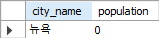

### WHERE가 없는 UPDATE문

* UPDATE문에서 WHERE절은 문법상 생략이 가능하지만, WHERE절을 생략하면 테이블의 모든 행의 값이 변경된다.
* 일반적으로 전체 행의 값을 변경하는 경우는 별로 없으므로 주의해야 한다.

In [ ]:
# 다음의 명령어를 실행하게 되면 문제점이 발생한다
#이 SQL문을 실행하면 4000개가 넘는 모든 도시이름이 '서울'로 바뀌게 된다
UPDATE city_popul
SET city_name = '서울';

In [ ]:
# 전체 테이블의 내용을 변경하게 되는  경우: 인구단위를 10000명 단위로 변경하고자 할 때
UPDATE city_popul
SET population = population / 10000;
SELECT * FROM city_popul LIMIT 5;

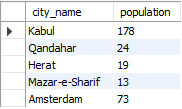

* 인구 열이 10000명 단위로 변경되어서 한눈에 보기 편해졌다.

## DELETE문

* 테이블의 행 데이터를 삭제해야 하는 경우에 사용하는 명령어
* UPDATE와 비슷하게 행 단위로 삭제하며 형식은 다음과 같다.
* DELETE FROM 테이블이름 WHERE 조건;
* UPDATE와 마찬가지로 WHERE절이 생략되면 전체 행 데이터를 삭제하므로 주의해야 한다.

In [ ]:
# 'New'로 시작하는 도시 삭제
DELETE FROM city_popul
WHERE city_name LIKE 'New%';

In [ ]:
# 'New'글자로 시작하는 도시 중 상위 몇 건만 삭제하려면 LIMIT구문과 함께 사용하면 된다.
# 'New'글자로 시작하는 도시 중 상위 5건만 삭제
DELETE FROM city_popul
WHERE city_name LIKE 'New%'
LIMIT 5;

* 이미 앞에서 관련데이터가 삭제 되어 0건이 삭제되었다고 표시된다.

### 대용량 테이블의 삭제

In [ ]:
# 대용량 테이블 생성
# 몇십만 건의 데이터를 가진 테이블들이 생성된다.
CREATE TABLE big_table1 (SELECT * FROM world.city, sakila.country);
CREATE TABLE big_table2 (SELECT * FROM world.city, sakila.country);
CREATE TABLE big_table3 (SELECT * FROM world.city, sakila.country);
SELECT COUNT(*) FROM big_table1;

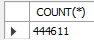

* 동일한 내용의 테이블 3개를 DELETE, DROP, TRUNCATE 등 각각 다른 방법으로 삭제해보면 아래와 같은 차이점이 존재한다.

In [ ]:
# 1. DELETE
# 삭제가 오래걸린다. 데이터가 더 많을 경우 훨씬 오랫동안 삭제를 수행하게 된다
DELETE FROM big_table1;

In [ ]:
# 2. DROP
# 테이블 자체를 삭제하여 속도가 상당히 빠르다.
DROP TABLE big_table2;

In [ ]:
# 3. truncate
# DELETE와 동일한 효과를 내지만 속도가 매우 빠르다
TRUNCATE TABLE big_table3;

* DROP은 테이블이 아예 없어지지만, DELETE와 TRUNCATE는 빈 테이블을 남긴다.
* TRUNCATE은 DELETE와 달리 WHERE문을 사용할 수 없다. 그러므로 TRUNCATE는 조건 없이 전체 행을 삭제할 때만 사용된다.
* 대용량 테이블의 전체 내용을 삭제할 때 테이블 자체가 필요 없을 경우 -> DROP
* 테이블의 구조는 남겨두고 싶을 경우 -> TRUNCATE
* 대량의 행 데이터를 모두 삭제할 때는 DELETE보다 TRUNCATE가 효율적이다.